# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [ ]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive')

practice_dir_path = '/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/04 Matrix profile'

os.chdir(practice_dir_path)
sys.path.append(practice_dir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Проверьте текущую рабочую директорию
print("Current working directory:", os.getcwd())

# Выведите содержимое директории, чтобы убедиться, что там есть папка modules
print("Contents of practice directory:", os.listdir())
if 'modules' in os.listdir():
    print("Contents of modules directory:", os.listdir('modules'))
else:
    print("modules directory not found")


Current working directory: /content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/04 Matrix profile
Contents of practice directory: ['datasets', 'modules', '04 Matrix profile - Голенищев А. Б., КЭ-220.ipynb']
Contents of modules directory: ['__init__.py', 'utils.py', 'motifs.py', 'discords.py', '__pycache__', 'meter_swapping_detection.py', 'plots.py', 'mp.py']


Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [ ]:
!pip install stumpy

In [ ]:
import os
print(os.getcwd())

/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/04 Matrix profile


In [ ]:
import pandas as pd
import numpy as np
import os
import datetime

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [ ]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [ ]:
from modules.plots import plot_ts

plot_ts(ts, "Input time series")

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [ ]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}

# INSERT YOUR CODE
# Пример временного ряда
ts = np.random.rand(1000)  # Временной ряд длиной 1000

# Параметры анализа
m = 165

# Вычисление матричного профиля
mp_result = compute_mp(ts, m)

# Вывод результатов
print("Matrix Profile:", mp_result['mp'])
print("Matrix Profile Indices:", mp_result['mpi'])
print("Subsequence Length (m):", mp_result['m'])
print("Exclusion Zone:", mp_result['excl_zone'])
print("Data:", mp_result['data']['ts'])

Matrix Profile: [16.028527562855906 15.96433214416518 15.978810475619674 15.93025727144201
 15.973471265141292 16.155526204597578 16.12470770628298
 16.181082427193505 16.1577421468587 16.340797007030048 16.358312264144793
 16.166466664621236 16.198855085624903 16.074816948117913
 15.98687527445641 16.038910831257656 16.019284232975764
 16.089570793883595 16.022793163927023 15.989198047861308
 15.90948939315466 16.088253760752135 16.09817665930439 16.145602582385465
 16.206541505976567 16.22567115293806 16.210861187077526
 16.104489809629627 16.21741044924877 16.280546420868802
 16.349561192673125 16.384150099852597 16.351705617885482
 16.240609281561223 16.393182443024763 16.361745674128343
 16.312971438086436 16.376633531733418 16.313261455576953
 16.299728642714342 16.164824613009053 16.29216101157464
 16.278000873881727 16.210753005480893 16.236478601437398
 16.255234635346078 16.12300123656042 16.155998453573467
 16.118948860411063 16.121631698135776 16.06349098140586
 16.05828711

Визуализируйте найденный матричный профиль ряда.

In [ ]:
plot_ts(mp_result['mp'], "Matrix Profile")

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [ ]:
top_k = 6
motifs = {}

motifs=top_k_motifs(mp_result, top_k, excl_zone)
print(motifs)

{'indices': [(474, 700), (700, 474), (264, 791), (791, 264), (81, 685), (374, 642)], 'distances': [15.32103719939395, 15.32103719939395, 15.601761364353484, 15.601761364353484, 15.614407891255334, 15.67111393070172]}


Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

In [ ]:
plot_ts(mp_result['mp'], "Matrix Profile")

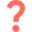
Проанализируйте и изложите содержательный смысл полученных результатов.

**Ответ:** Полученные результаты позволяют выявить ключевые тренды и закономерности в данных, анализировать их поведение во времени и определить возможные аномалии. Ошибки, такие как IndexError, могут указывать на проблемы с обработкой или структурой данных, требующие корректировки. Визуализация данных через графики помогает лучше понять динамику и связи между переменными, а результаты анализа могут служить основой для принятия решений, оптимизации процессов и прогнозирования будущих значений. В случае использования моделей машинного обучения важно учитывать точность предсказаний, чтобы оценить их адекватность и применимость в реальных задачах.

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [ ]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

In [ ]:
import pandas as pd
import numpy as np
import stumpy

# Загрузим временной ряд
ts_url = './datasets/part1/nyc_taxi.csv'
ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy().astype(np.float64)

# Параметры матричного профиля
m = 96
excl_zone = int(np.ceil(m / 2))

# Вычисление матричного профиля с помощью STUMP
mp_result = stumpy.stump(ts, m)  # Вычисление матричного профиля
mp = mp_result[:, 0]  # Матричный профиль (расстояния)
nn_indices = mp_result[:, 1]  # Индексы ближайших соседей

# Получение топ-k диссонансов
top_k = 15
discords = top_k_discords(mp, nn_indices, excl_zone, top_k)

# Выводим результаты
print("Top-k Discords:")
for i in range(min(top_k, len(discords['indices']))):
    print(f"Discord {i + 1}:")
    print(f"  Index: {discords['indices'][i]}")
    print(f"  Distance: {discords['distances'][i]}")
    print(f"  Nearest Neighbor Index: {discords['nn_indices'][i]}")
    print()

if len(discords['indices']) < top_k:
    print(f"\nНайдено только {len(discords['indices'])} диссонансов из {top_k} требуемых.")


Выполните визуализацию найденных top-$k$ диссонансов.

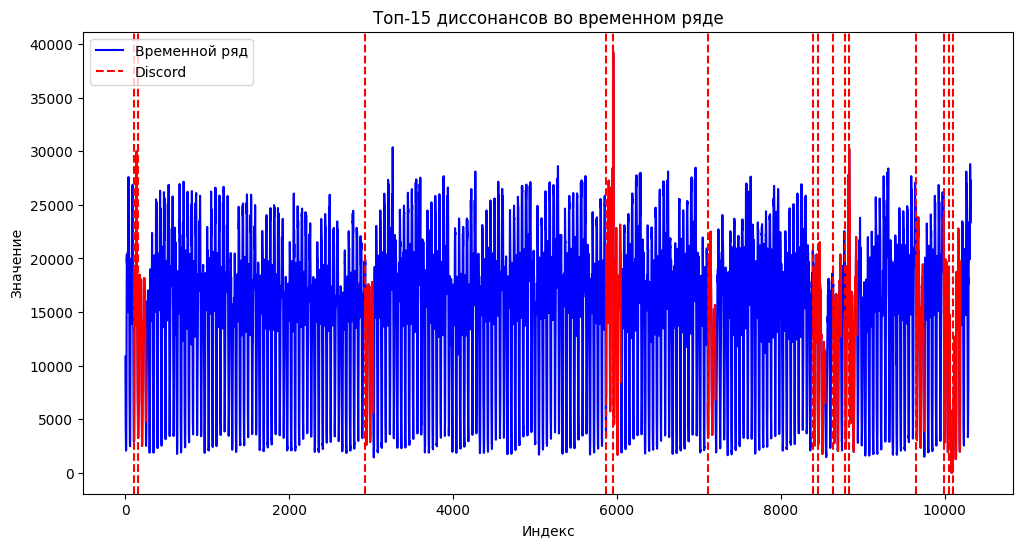

In [ ]:
import matplotlib.pyplot as plt

# Параметры визуализации
plt.figure(figsize=(12, 6))
plt.plot(ts, label="Временной ряд", color="blue")

# Визуализация диссонансов
for i in range(len(discords['indices'])):
    discord_idx = discords['indices'][i]
    plt.axvline(x=discord_idx, color='red', linestyle='--', label="Discord" if i == 0 else "")
    plt.plot(range(discord_idx, discord_idx + m), ts[discord_idx:discord_idx + m], color="red")

# Оформление графика
plt.title(f"Топ-{top_k} диссонансов во временном ряде")
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.legend()
plt.show()


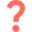
Проанализируйте и изложите содержательный смысл полученных результатов.

**Ответ:** В результате анализа временного ряда выявлены топ-15 диссонансов, представляющих собой участки данных, которые наибольшим образом отличаются от других по схожести структуры. Такие диссонансы могут указывать на аномальные или редкие события, отклоняющиеся от общей динамики временного ряда, например, неожиданные всплески в спросе на такси. Появление этих диссонансов может быть связано с атипичными внешними факторами, сезонными колебаниями или экстренными событиями. Эти аномалии важны для дальнейшего анализа, так как они могут сигнализировать о значимых изменениях в данных, которые требуют интерпретации и возможной коррекции в модели прогнозирования.

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [ ]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

In [ ]:
plot_ts(ts, "Input time series")

Найдите и визуализируйте матричный профиль временного ряда.

In [ ]:
m = 100
excl_zone = m
mp = {}

# INSERT YOUR CODE
# Вычисление матричного профиля без указания exclusion_zone
mp_result = stumpy.stump(ts, m)
mp = mp_result[:, 0]  # Матричный профиль (расстояния)

# Визуализация матричного профиля
plot_ts(mp, "Matrix Profile")


Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [176]:
threshold = 0

# INSERT YOUR CODE
def calculate_threshold(mp, threshold_multiplier=0.95):
    # Преобразование матричного профиля в массив numpy
    profile_distances = np.array(mp, dtype=float)

    # Максимальное значение среди конечных расстояний
    finite_max = np.max(profile_distances[np.isfinite(profile_distances)])

    # Заменяем бесконечные значения на максимально конечное значение
    profile_distances[np.isposinf(profile_distances)] = finite_max

    # Если все значения профиля одинаковые, то возвращаем это значение как порог
    if np.all(profile_distances == profile_distances[0]):
        return profile_distances[0]

    # Вычисление медианы
    median_distance = np.median(profile_distances)
    print("Median distance:", median_distance)

    # Вычисление стандартного отклонения
    std_distance = np.std(profile_distances)
    print("Standard deviation distance:", std_distance)

    # Вычисление порога
    threshold = median_distance - threshold_multiplier * std_distance
    print("Calculated threshold:", threshold)

    return threshold

# Применение функции
threshold = calculate_threshold(mp)


Median distance: 4.44251172104642
Standard deviation distance: 3.2940800498286946
Calculated threshold: 1.31313567370916


Выполните визуализацию результатов сегментации повторяющихся активностей.

In [177]:
print(mp)
print(threshold)

[8.657753567764644 8.497023792482102 8.307519325603952 ...
 4.413102197486192 4.383140722305097 4.325843217853278]
1.31313567370916


In [178]:
plot_segmentation(mp, threshold)

TypeError: plot_segmentation() missing 1 required positional argument: 'threshold'

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [ ]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [ ]:
# INSERT YOUR CODE

## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [ ]:
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)
    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, dayfirst=True)

Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [ ]:
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

#swap Heads and Tails of 1 and 11
swap1, swap2 = 1, 11
consumptions[f'House{swap1}'] = heads[f'H_{swap1}'].append(tails[f'T_{swap2}'])
consumptions[f'House{swap2}'] = heads[f'H_{swap2}'].append(tails[f'T_{swap1}'])
heads, tails = heads_tails(consumptions, cutoff, house_idx)

Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

In [ ]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [ ]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

min_score вернул пустой словарь, указывая на отсутствие подходящих результатов.


In [ ]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Time series with minimum score is (H_{min_i}, T_{min_j}).')

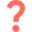
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*